In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random as rd
from scipy.spatial.distance import cdist 
import sys
%matplotlib inline

# 1) K-MEANS

## a) Program from scratch the clustering algorithm k-means with random initialization.

In [2]:
class k_means:

    def __init__(self, N_c):
        
        self.N_centroids = N_c
        
    def initialization_of_centroids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[ sel ]
    
    def initialization_of_centroids_plusplus(self):    
        i=rd.randint(0,self.N_points-1)
        centroids=np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D=np.array([]) 
            D=np.append(D,np.min(cdist(self.data, centroids,'sqeuclidean'), axis=1))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            centroids=np.append(centroids,[self.data[i]],axis=0)
        return centroids
         
    
    def fit(self, data, init="random", N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0]
        
        if init=="k-means++":
            self.centroid_positions =  self.initialization_of_centroids_plusplus()
        else:    
            self.centroid_positions =  self.initialization_of_centroids_random()
            
        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
            dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
            self.labels = np.argmin(dist2_mat, axis = 1)
            loss = dist2_min.sum() 
            skip=False
            for i in range(self.N_centroids):
                if len(self.data[self.labels  == i ]) == 0:
                    skip = True
            if skip == True :
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels  == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations-1: 
            print("Max iterations reached")
        return loss, cnt 

       
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')
        
    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_centroids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_centroids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_centroids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_centroids * SSW/SSB    
     

## b) Download the data set S3 from http://cs.uef.fi/sipu/datasets/

18710840577080.46 25
CPU times: user 200 ms, sys: 7.78 ms, total: 208 ms
Wall time: 234 ms


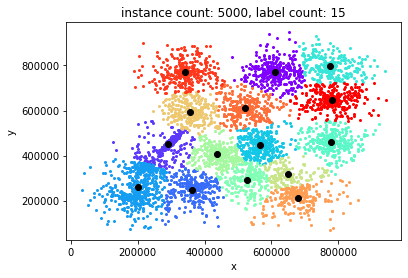

In [3]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
myk = k_means(15)
loss,iteration=myk.fit(data_points) 
myk.plot()
print(loss,iteration)

## c) Apply the algorithm with k=15 100 times, obtain the best value of the objective function and the average one. Plot the assignation for the best case.

0 21119352323187.68 34
1 20690416054280.39 43
2 16889798176980.414 13
3 19199838575204.547 52
4 16889622239622.623 14
5 18727711807503.64 14
6 21484997510444.742 23
7 18884029273677.023 38
8 21375635393166.973 27
9 18771529438025.656 44
10 21198695430464.336 31
11 21209982963329.484 42
12 18786974315828.65 14
13 21258330391603.227 17
14 18818140277046.15 48
15 18994479691454.46 21
16 19361452663268.137 10
17 18710508051656.42 32
18 21018666885482.18 43
19 18744785843326.18 18
20 18653858283433.582 21
21 20718003716849.164 23
22 18818200372757.14 28
23 18958077094118.656 18
24 18743303518544.402 25
25 19231010718554.266 36
26 16890218564715.617 22
27 18980823081593.656 16
28 18865247829008.1 12
29 19034164842133.332 13
30 18823446440934.78 13
31 19124462519273.348 18
32 20987379396609.953 22
33 21032067694280.977 29
34 19200745650741.336 65
35 18822568875876.37 13
36 18784970518121.99 47
37 16890205401273.566 13
38 18744982540728.156 20
39 21482514304481.875 23
40 19259114791870.35 20
4

325 18711066405799.742 29
326 22882792897176.195 28
327 18883645263761.957 16
328 16890298787206.658 15
329 16890511932312.121 41
330 20712233404339.164 23
331 18843921912097.09 46
332 18847744895295.79 37
333 22998820064719.6 24
334 19204477064896.74 13
335 19185916585679.414 47
336 18961610384366.254 20
337 18625929730438.438 10
338 19240705414563.234 29
339 20655471447883.11 45
340 19030453646118.258 17
341 19257382040777.086 21
342 18810556183771.11 21
343 21268853411725.934 30
344 21018934711264.168 29
345 19232136864572.68 35
346 19258906460837.555 23
347 18877889136274.977 16
348 21073259004798.746 24
349 18887844964699.39 35
350 18901630882418.0 36
351 20979538181887.594 34
352 21024989839647.234 77
353 22851744127098.938 14
354 16890251267437.508 26
355 21061518158312.473 38
356 19407934652685.82 12
357 19043098783640.12 21
358 16889723696986.129 14
359 18820429060979.04 37
360 18890744406539.65 20
361 18693910761269.28 31
362 18662971591517.01 17
363 19200740038615.855 40
364

647 21373603875370.08 37
648 18877987329240.246 17
649 19037966738646.316 35
650 19030201607941.574 27
651 18929270015723.836 13
652 19409280002557.633 17
653 18754761576547.79 42
654 18909192846184.133 14
655 18962862890217.28 23
656 20924032669881.57 40
657 22833142687111.406 30
658 18825268671087.742 30
659 18894811385686.984 14
660 16890066072235.412 21
661 21164818975869.95 13
662 19124235328630.18 22
663 18952666646406.914 46
664 20915930641107.25 45
665 21196529550880.812 19
666 18744700596388.22 22
667 18831335591837.055 20
668 20991160096200.74 30
669 16890637522523.598 20
670 18683086881325.637 27
671 18712425254624.637 23
672 18956172079546.832 21
673 19334321266012.812 19
674 20654262808493.914 22
675 16889617715520.68 17
676 18908701841635.68 24
677 21354517997923.086 14
678 18901690116916.69 18
679 20991520921141.824 22
680 18668814246131.625 26
681 20698031667118.867 21
682 21191472613476.984 27
683 22726413384878.875 29
684 18977037787640.664 15
685 19359423376916.062 2

969 20889355418697.984 42
970 18599207941304.21 21
971 19200784256002.32 46
972 23248519287790.914 32
973 18668814246131.625 33
974 19083543435060.43 51
975 22929949503401.734 33
976 18599598515568.21 26
977 18710524323374.875 14
978 18600250927810.84 20
979 19083520026991.715 13
980 16890529437181.139 29
981 18883471086514.953 44
982 18926012288968.066 26
983 19214203340993.996 31
984 18737605897657.016 25
985 18892316058644.58 39
986 18914644104030.086 27
987 19014644491771.53 26
988 16890251267437.508 42
989 23848353734188.062 15
990 18883004098206.754 28
991 18917512374845.547 17
992 18992135190914.465 13
993 19043211550509.645 31
994 16889837709142.43 31
995 16889684971885.791 14
996 18899983475246.0 24
997 19341136077922.062 27
998 18855560000128.227 10
999 18804392690541.83 43
mean =  19566531888230.68
i_min =  889
min =  16889571849356.738
avg convengece =  26.516


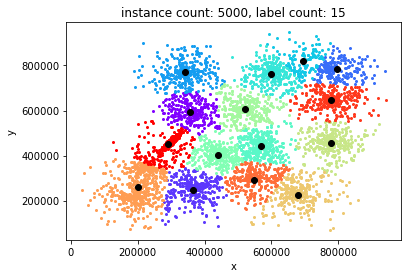

CPU times: user 1min 18s, sys: 1.06 s, total: 1min 19s
Wall time: 1min 32s


In [4]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="random") 
    if loss < min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i, loss, iteration)    
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.95 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  27  \text{ iterations}$$

## d) Implement K-means ++ initialization in your algorithm and redo point c)

0 16890529666022.984 12
1 18771324347447.195 21
2 21330446208305.367 19
3 18821115944334.586 17
4 18844119241134.83 11
5 19030168162020.508 18
6 20902071650162.76 13
7 19221616967923.215 38
8 18821998516788.742 12
9 19221349203370.758 33
10 21337456248535.562 21
11 18956655535921.754 25
12 18883044112601.277 29
13 18822560574110.305 16
14 20828321461045.19 38
15 18743839262412.523 17
16 16890385632775.113 23
17 19083861496603.516 45
18 20859086516895.777 20
19 16889937065346.133 28
20 18878171319780.42 19
21 19221452701115.867 17
22 18683499082264.11 32
23 18786017192082.41 12
24 18954972470641.035 16
25 19041614381709.5 31
26 18693540126378.367 25
27 16889927294209.805 14
28 20628956796608.676 24
29 16890297655310.484 24
30 18901553327810.484 29
31 18710477629748.07 22
32 21254488995952.75 22
33 21165981918547.125 10
34 18786063749307.895 31
35 16890388919578.465 18
36 18992679030015.523 15
37 18953623743723.79 26
38 18817841021898.85 33
39 21069036507981.57 35
40 18600276685204.83 17

324 18864301773222.32 48
325 20942792725295.203 26
326 20998075652038.367 22
327 16890251267437.508 12
328 16889930799861.672 25
329 16889948035990.727 15
330 16889602517268.717 26
331 18913018103801.754 39
332 18887965700858.906 16
333 18699620781094.965 13
334 18831213620365.977 14
335 20998244267420.055 20
336 20972177676381.258 25
337 21387612027415.645 30
338 18663869643291.89 32
339 20900464009786.805 19
340 21024887274571.523 18
341 18599112670565.03 28
342 20928044155630.25 22
343 18662773004578.715 26
344 20661677874225.77 31
345 18663076694586.58 24
346 18865040677610.32 39
347 20642202304995.1 17
348 16890250679330.906 17
349 19042998309222.99 11
350 16890719389574.705 34
351 18992535303024.832 22
352 20723770333934.625 16
353 16889602517268.717 21
354 18803993962644.633 21
355 16890647869037.102 37
356 20603191274096.29 20
357 18848694209868.57 12
358 20873271736927.65 13
359 18977807153277.055 29
360 18693858077007.668 30
361 16890560487947.574 17
362 18810485009804.43 13


645 19214151728392.625 29
646 20688162919446.594 18
647 18893273419516.836 39
648 18814638239614.156 48
649 20990692387779.562 18
650 18825645870007.156 21
651 16889571849356.738 14
652 19236504215845.46 10
653 20965250178163.29 9
654 16890647869037.102 22
655 16890382915725.016 23
656 20801956844457.066 23
657 21500681280337.344 22
658 19240710588773.613 17
659 18718246451757.44 23
660 18744430826139.285 17
661 18890908623266.03 24
662 21117200581428.383 19
663 18581353446391.6 13
664 16890181389317.531 19
665 18804006989148.39 37
666 18710524323374.875 16
667 18808601485960.047 25
668 18832816979309.668 64
669 20628123952009.12 15
670 18581796088649.332 11
671 18913901480128.406 17
672 18886296042946.11 31
673 21089071072404.207 19
674 20943237887345.562 23
675 18978490151033.78 22
676 18700995125634.844 16
677 18599377255820.89 10
678 19221288281030.824 27
679 20647409520600.824 35
680 16889963706385.707 12
681 18959519752079.047 14
682 16889602517268.717 18
683 21213613677369.07 12

968 16889913294992.654 17
969 16890348885439.148 9
970 19040948318380.18 25
971 21172691465405.54 30
972 18991518282649.33 25
973 21008118198784.97 15
974 18958190947622.203 20
975 18864699941428.21 15
976 19181567251812.098 20
977 19231179055147.54 13
978 18914066375752.086 31
979 18710546259208.68 19
980 16889670412403.617 16
981 16889620022137.732 17
982 16890701884705.688 38
983 20657362394052.03 13
984 20624315062811.984 35
985 18900036983365.684 16
986 19239009226351.355 25
987 18786080750536.895 34
988 19010732097364.88 17
989 18891227563911.36 36
990 20751216357414.906 18
991 19006611045299.527 15
992 20632109103570.664 38
993 18713351454210.445 19
994 21017011594206.297 27
995 18921641765378.527 15
996 16890298338482.922 23
997 18896185302777.65 15
998 16889820756396.291 26
999 19407483161906.23 17
mean =  19003344621232.94
i_min =  651
min =  16889571849356.738
avg convengece =  23.261


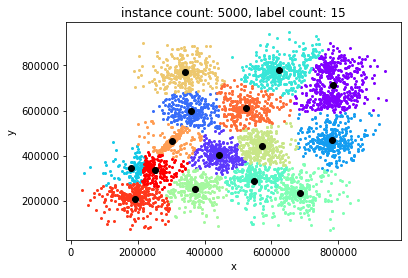

CPU times: user 1min 4s, sys: 958 ms, total: 1min 5s
Wall time: 1min 8s


In [5]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myk = k_means(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myk.fit(data=data_points, init="k-means++") 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myk = tmp_myk
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_myk.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

Note:
    $$ \text{mean} \simeq 1.89 \times 10^{13} $$
    $$ \text{avg convengece in} \simeq  23  \text{ iterations}$$

## e) Perform the scree plot (with k from 2 to 20) for this data set using the best value of the objective function.

2 210428334804957.56
3 139614749639647.7
4 91771622303874.1
5 75054113455106.05
6 61401925339832.914
7 50219935269293.875
8 42058237974477.24
9 36048589584476.06
10 30332860333232.836
11 27297357221359.074
12 24424371756925.793
13 21767253017798.883
14 19210855194120.21
15 16889617715520.68
16 16196934228305.5
17 15607681432507.713
18 15052404147072.416
19 14548673254479.059
20 13983754138219.684
CPU times: user 1min 23s, sys: 472 ms, total: 1min 23s
Wall time: 1min 24s


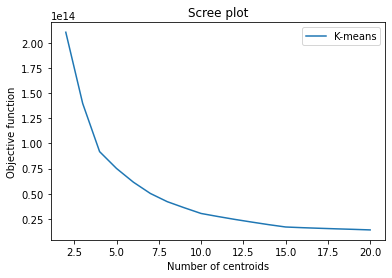

In [6]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_k=list()

for n_c in range(2,21):
    tmp_myk = k_means(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration=tmp_myk.fit(data=data_points) 
        if loss<min_loss:
            min_loss=loss
            i_min=i
            min_myk = tmp_myk  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_k.append([n_c,losses[i_min]])

res_k=np.array(res_k)
plt.plot(res_k[:,0], res_k[:,1], label="K-means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

# 2. FUZZY C-MEANS

## a) Modify k-means for obtaining c-means.

We use this relation:

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{|| x_i-c_j||}{||x_i-c_k||}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{\sqrt{ (x_i-c_j)^2 }}{\sqrt{(x_i-c_k)^2}}\right)^{\frac{2}{m-1}} }$$

$$ u_{ij}=\frac{1}{\sum_{k=1}^C\left( \frac{ (x_i-c_j)^2 }{(x_i-c_k)^2}\right)^{\frac{1}{m-1}} }$$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left((x_i-c_k)^2\right)^{\frac{1}{m-1}}   }{ \left((x_i-c_j)^2 \right)^{\frac{1}{m-1}}} $$


$$ u_{ij}= \frac{   \sum_{k=1}^C \left(d^2_{ik}\right)^{\frac{1}{m-1}}   }{ \left(d^2_{ij} \right)^{\frac{1}{m-1}}} $$

$$ u_{ij}= \frac{  \tilde{u}_{ij}  }{  \sum_{k=1}^C \tilde{u}_{ik}  } $$

where

$$ \tilde{u}_{ij}  = \frac{1}{\left(d^2_{ij}\right)^{\frac{1}{m-1}} } $$

In [7]:
class fuzzy_c_means:

    def __init__(self, N_c, m=2):
        self.N_centroids = N_c
        self.m = m
        self.centroid_positions =np.empty((self.N_centroids,2))

    def fit(self,data, N_max_iterations=500, tol=1e-3):
        self.data = data
        self.N_points = np.shape(self.data)[0]
        self.u = np.empty((self.N_centroids,self.N_points))
        # Randomly initialize centers
        self.centroid_positions = self.data[np.random.choice(self.N_points, size=self.N_centroids, replace=False)]
    
        dist = np.fmax(
            cdist(self.centroid_positions, self.data, metric='sqeuclidean'), np.finfo(np.float64).eps)
        prev_u = np.ones((self.N_centroids,self.N_points))
        for iteration in range(N_max_iterations):     
            utilde = (1 / dist) ** (1 / (self.m-1))
            self.u  = (utilde / utilde.sum(axis=0))
            um=self.u **self.m
            denominator = np.reshape(um.sum(axis=1),(self.N_centroids,1))
            self.centroid_positions = um.dot(self.data)/denominator
            dist = cdist(self.centroid_positions, self.data, metric='sqeuclidean')
            dist2_min = np.array([np.min(dist,axis=0) ]) 
            self.labels = np.argmin(dist,axis=0)
            loss=dist2_min.sum() 
            if np.linalg.norm(prev_u-self.u )<tol: 
                break
            prev_u=self.u 
            
        return loss, iteration
    
    def plot(self):    
        
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_centroids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')



## b) Perform the scree plot for the same data set.

2 213560784517341.4
3 146155086559554.25
4 93722401809964.78
5 78198879275074.72
6 63888892467776.484
7 52167560044266.63
8 44796854197716.516
9 37850004618076.74
10 31328221868208.65
11 28053828111859.137
12 24964195438505.555
13 22374413462448.336
14 19591190866165.03
15 16941893776053.438
16 16316226965371.2
17 15817189354716.814
18 15322449767949.113
19 14875558519750.582
20 14463323837584.852
CPU times: user 8min 49s, sys: 10.5 s, total: 8min 59s
Wall time: 4min 58s


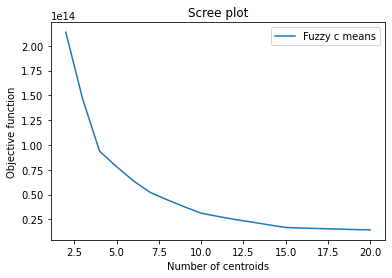

In [8]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=100

res_fuzzy=list()

for n_c in range(2,21):
    tmp_myfuz = fuzzy_c_means(n_c)
    min_loss= np.inf
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss,iteration =tmp_myfuz.fit(data=data_points) 
        if loss<min_loss:
            min_loss = loss
            i_min=i
            min_myfuz = tmp_myfuz  
        losses[i]=loss
        iterations[i]=iteration
    print(n_c,losses[i_min])    
    res_fuzzy.append([n_c,losses[i_min]])

res_fuzzy=np.array(res_fuzzy)
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
plt.legend()

## Scree plot comparison 

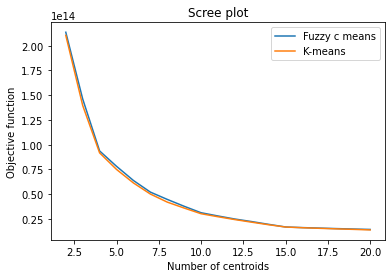

In [9]:
plt.plot(res_fuzzy[:,0], res_fuzzy[:,1], label="Fuzzy c means")
plt.plot(res_k[:,0], res_k[:,1], label="K-means")

plt.title("Scree plot")
plt.ylabel('Objective function')
plt.xlabel('Number of centroids')
#plt.yscale("log")
plt.legend()

## c) Plot the assignation for the best case.

0 19638937761126.367 80
1 16941910727812.176 109
2 19323982149268.273 100
3 16941909293459.848 23
4 16941896817004.879 44
5 19785407640456.445 79
6 19786095825821.547 64
7 16941909083282.598 65
8 19594604161672.484 71
9 21297614974683.625 84
10 19323983488577.953 75
11 19698770137465.22 85
12 16941907568152.848 99
13 16941901070421.557 41
14 23574619446676.414 141
15 19558515327869.727 109
16 19220250868733.617 104
17 21236578711785.156 177
18 16941907388919.008 102
19 19895136317372.652 196
20 19745203789990.523 103
21 16941901110049.688 22
22 19773614847694.594 117
23 19339577088206.332 78
24 19449951609947.14 56
25 19792725502785.438 135
26 16941909367193.303 124
27 19871917747367.008 69
28 19698768535885.688 52
29 19220303460532.336 35
30 23573815887112.89 62
31 19352452442979.336 79
32 19698839866154.695 62
33 16941910595415.102 44
34 19220356122036.992 54
35 19339574825275.543 149
36 20690574894998.5 176
37 19785371349063.496 54
38 19152645379070.484 94
39 19339506549794.664 37
4

320 20690574750018.53 106
321 16941909785199.777 94
322 16941902335720.861 58
323 19785666622047.4 134
324 16941908335213.541 91
325 19449859317066.29 38
326 16941898544409.95 31
327 21257887853836.375 83
328 16941917851431.764 28
329 19792726640067.367 66
330 21318606953361.125 65
331 19745204435993.938 51
332 19079774264634.832 149
333 19594555053471.242 69
334 19785676100130.793 113
335 19638456037774.2 114
336 19641173995781.008 114
337 19094259393398.574 52
338 19594414071093.75 62
339 16941903943515.137 23
340 19558508724430.95 55
341 16941911076130.602 123
342 19640996310855.117 98
343 19773614499268.17 164
344 16941903338377.818 30
345 16941912619604.766 51
346 19323982899203.133 76
347 19558496904754.75 50
348 19220315639473.93 49
349 16941900891927.086 45
350 19352453056812.83 57
351 16941902225045.18 28
352 19745181328749.074 65
353 16941910101598.395 29
354 19094282659860.793 45
355 19079846259925.906 61
356 19352399611179.203 96
357 19352399576723.086 77
358 16941901730744

638 19339575342999.207 52
639 16941908879922.62 91
640 16941907833732.191 143
641 19220250715144.18 56
642 16941898216412.266 30
643 16941897938215.887 29
644 16941897251582.809 119
645 19445234311710.76 50
646 16941909171924.768 53
647 19220251055914.383 172
648 19785669925153.08 125
649 19638826074036.43 76
650 19339527599387.156 38
651 19716295330259.52 68
652 19449947891839.676 55
653 16941896343616.102 22
654 19785673399244.805 133
655 16941917767573.746 31
656 19785669343105.82 97
657 21318599249581.64 63
658 16941898531018.695 57
659 21297697018002.164 59
660 19445367965865.656 67
661 19698769913631.11 90
662 16941901393726.78 43
663 16941902185210.84 48
664 19220233426156.426 51
665 16941901342745.734 25
666 19698838559087.156 71
667 19558515693193.965 106
668 19094289401725.66 95
669 19792730545965.832 63
670 16941902893427.81 42
671 16941908691717.021 63
672 19403896970429.867 108
673 19897239379421.547 162
674 16941909275727.396 26
675 16941909849907.893 81
676 2125792797479

955 16941908209057.121 34
956 16941907749067.902 48
957 16941899111137.645 170
958 16941899196663.965 152
959 19352401994095.57 217
960 19542129064252.324 68
961 16941903033592.559 38
962 16941909838030.842 46
963 16941911493410.984 56
964 22403103414812.81 200
965 19339535085175.387 47
966 16941897209152.098 41
967 21236578812900.305 89
968 16941898497461.338 51
969 16941910048817.861 45
970 19785664830608.023 130
971 19594611762266.64 153
972 19594445436906.89 105
973 19662368060607.223 78
974 20732094427417.227 139
975 19594763483788.11 52
976 16941898786216.586 56
977 16941898856781.656 22
978 16941909188887.336 33
979 16941904426395.092 35
980 19089054634627.11 70
981 19220353250931.574 70
982 16941899703242.238 25
983 22360408905313.016 100
984 21236588903812.5 57
985 21493615869903.164 151
986 19339492346729.855 66
987 16941907742869.188 125
988 19220242047246.453 53
989 19785907174899.086 80
990 19785672243046.527 107
991 19785082616060.0 67
992 16941911704866.11 138
993 196623

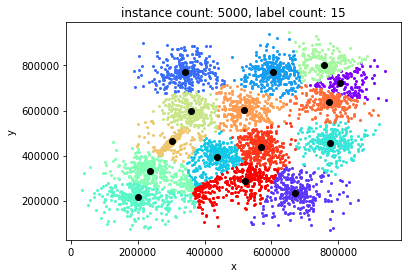

CPU times: user 4min 56s, sys: 8.28 s, total: 5min 4s
Wall time: 3min 13s


In [10]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_myfuz = fuzzy_c_means(15)
min_loss=np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_myfuz.fit(data_points) 
    if loss<min_loss:
        min_loss=loss
        i_min=i
        min_myfuz = tmp_myfuz
    print(i,loss,iteration)
    losses[i]=loss
    iterations[i]=iteration
    
min_myfuz.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

## (Optional) modify your k-means code for obtaining k-medoids.

In [11]:
class k_medoids():
   
    def __init__(self, N_m=8):

        self.N_medoids = N_m
        
    def initialization_of_medoids_random(self):    
        sel = np.random.choice(self.N_points, size=self.N_medoids, replace=False)
        return sel
 
    def fit(self, data, N_max_iterations=1000):
        
        self.data=data
        self.N_points = np.shape(self.data)[0] 
        medoid_idxs = self.initialization_of_medoids_random()
        
        D_matrix = cdist(self.data, self.data,'sqeuclidean')

        for cnt in range(N_max_iterations):
            old_medoid_idxs = np.copy(medoid_idxs)
            labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
            self.update_medoids(D_matrix, labels, medoid_idxs)
            if np.all(old_medoid_idxs == medoid_idxs):
                break
                
        self.centroid_positions = self.data[medoid_idxs]
        self.labels = np.argmin(D_matrix[medoid_idxs, :], axis=0)
        dist2_mat = cdist(self.data, self.centroid_positions,'sqeuclidean')   
        dist2_min = np.array([np.min(dist2_mat, axis = 1) ]) 
        loss = np.sum(dist2_min)
        
        return loss, cnt

    def update_medoids(self, D, labels, medoid_indexes):

        for k in range(self.N_medoids):
            cluster_k_indexes = np.where(labels == k)[0]
            if len(cluster_k_indexes) == 0:
                continue
            intra_cluster_distances = D[cluster_k_indexes, cluster_k_indexes[:, np.newaxis]]
            intra_cluster_all_costs = np.sum(intra_cluster_distances, axis=1)
            min_cost_index = np.argmin(intra_cluster_all_costs)
            min_cost = intra_cluster_all_costs[min_cost_index]
            curr_cost = intra_cluster_all_costs[np.argmax(cluster_k_indexes == medoid_indexes[k])]
            if min_cost < curr_cost:
                medoid_indexes[k] = cluster_k_indexes[min_cost_index]

    def plot(self):    
        colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, self.N_medoids))
        title_ = "label graph" 
        fig = plt.figure()
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_medoids):
            arr_points=self.data[self.labels  == cen]
            plt.scatter(arr_points[:,0],arr_points[:,1], color=colors[cen],s=4)
        plt.scatter(self.centroid_positions[:,0],self.centroid_positions[:,1], color="k")   
        title_text = 'instance count: %d, label count: %d' % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel('x')
        plt.ylabel('y')  

    def get_assignation(self):
        out = np.empty((self.N_points,3))
        for idx in range(self.N_points):
            out[idx,0]=self.data[idx][0]
            out[idx,1]=self.data[idx][1]
            out[idx,2]=self.labels[idx]
        return out      
    
    
    def F_ratio_index(self):
        SSW=0
        SSB = 0
        n_points_per_centroid=np.empty(self.N_medoids)
        xbar=self.data.mean(axis=0)
        for cen in range(self.N_medoids):
            centroid_points=self.data[self.labels  == cen]
            n_points_per_centroid[cen] = np.shape(centroid_points)[0]
            c = self.centroid_positions[cen].reshape((1,2))
            SSW += cdist(centroid_points, c, 'sqeuclidean').sum()
        
        for cen in range(self.N_medoids):
            a = self.centroid_positions[cen].reshape((1,2))
            b = xbar.reshape((1,2))
            SSB += n_points_per_centroid[cen] * cdist(a, b  ,'sqeuclidean').sum()
        return self.N_medoids * SSW/SSB    
      

0 19015680202051.0 16
1 18665056849940.0 16
2 20876217633902.0 8
3 19536374485949.0 9
4 18928711554682.0 8
5 18961955931516.0 23
6 18911285816372.0 11
7 20841156533500.0 9
8 18865261601175.0 12
9 18871369425189.0 19
10 20788772903374.0 12
11 18881465898919.0 8
12 27175934021622.0 15
13 18741369560261.0 7
14 23284266046488.0 8
15 23702210168380.0 10
16 18972099532783.0 19
17 21573456182801.0 7
18 21854571851321.0 10
19 23093682826600.0 8
20 18945822731374.0 14
21 24976690262907.0 12
22 21314258410673.0 13
23 21067631558641.0 20
24 21248057955392.0 14
25 20855202881998.0 8
26 21577280460158.0 12
27 16902628028072.0 16
28 21413826826208.0 15
29 21225937186150.0 8
30 19461548448925.0 8
31 19288658125618.0 12
32 19213781001280.0 15
33 16903034724777.0 21
34 21072689767521.0 17
35 18929645823468.0 10
36 18479749691679.0 17
37 19328604034068.0 22
38 21339568589745.0 13
39 18946417638169.0 14
40 20974576420318.0 18
41 18856313714893.0 13
42 20667094984207.0 10
43 20858932776963.0 11
44 1929542

350 18999346101458.0 19
351 20867469091847.0 14
352 18841998010793.0 17
353 25128202458463.0 9
354 21018513593827.0 16
355 20844662012106.0 15
356 21242771290987.0 17
357 21733085721243.0 11
358 18778367182651.0 17
359 23368485709805.0 9
360 21290046504531.0 11
361 21192620801223.0 11
362 18955403939013.0 7
363 18892708725762.0 14
364 18971163235140.0 11
365 16902628028072.0 11
366 19422987048090.0 9
367 19017208244729.0 14
368 19017726037675.0 6
369 19071731829821.0 12
370 20831492319033.0 20
371 19036478219385.0 14
372 22718114601865.0 7
373 21673003807647.0 8
374 23285729518574.0 12
375 21460996175028.0 6
376 18796782866232.0 9
377 20899239431701.0 8
378 20807136012873.0 15
379 21458655323698.0 14
380 18665832976035.0 9
381 24050713682801.0 7
382 18966445287840.0 9
383 21402249582936.0 17
384 23466588298735.0 14
385 20419239919913.0 13
386 20989694119495.0 7
387 18894318965388.0 9
388 25066933636036.0 12
389 21216424078821.0 10
390 21098216681658.0 9
391 21133341385701.0 11
392 2135

695 18727178070048.0 11
696 19260449181361.0 13
697 21844523560595.0 10
698 21508658759446.0 8
699 18868233867637.0 19
700 20836993267541.0 13
701 18758963283218.0 11
702 18999350359460.0 15
703 23611518346538.0 16
704 19384356755517.0 16
705 21234655243822.0 12
706 25132743220720.0 11
707 19308732056713.0 12
708 21450163815343.0 13
709 19147903892337.0 11
710 18892370726514.0 9
711 21176187410598.0 6
712 18969719054885.0 11
713 19267563880430.0 33
714 20799987632816.0 12
715 18876169448780.0 12
716 18982364097322.0 9
717 21185718896710.0 6
718 23084316903312.0 10
719 21538280489701.0 10
720 21118763213802.0 13
721 16903414146199.0 16
722 19300093118961.0 15
723 27269944363290.0 9
724 27049029413791.0 10
725 18976744469784.0 13
726 19086037150553.0 14
727 19068920597454.0 9
728 21162507191112.0 12
729 19286887518967.0 11
730 19138873952842.0 16
731 22954998720304.0 13
732 23097395939968.0 10
733 20734844463688.0 10
734 19159834797018.0 14
735 18908500025006.0 12
736 18998975105572.0 14

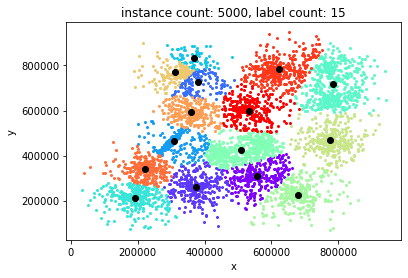

CPU times: user 6min 34s, sys: 1min 32s, total: 8min 6s
Wall time: 8min 47s


In [12]:
%%time
filename="data/s3.txt"
data_points = np.loadtxt(filename) 
N_simulations=1000
tmp_mymed = k_medoids(15)
min_loss= np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss,iteration=tmp_mymed.fit(data=data_points) 
    if loss < min_loss:
        min_loss = loss
        i_min=i
        min_mymed = tmp_mymed
    print(i,loss,iteration)        
    losses[i]=loss
    iterations[i]=iteration
    
min_mymed.plot()
print("mean = ",losses.mean())
print("i_min = ",i_min)
print("min = ",losses[i_min])    
print("avg convengece = ",iterations.mean())
plt.show()

In [13]:
print(min_mymed.F_ratio_index())

0.8734693731053439
